# Titanic Survivor Data Analysis

Introduction:

Purpose: To perform data analysis on a sample Titanic dataset. This dataset contains demographical data of 891 passengers and crew on board. Detailed description of the dataset can be found at https://www.kaggle.com/c/titanic/data

*What factors made people more likely to survive?*

**1. Were socio-economic standing a factor?**

**2. Did age determine your chances of survival?**

**3. Did women and children have preference?**


### Data Wrangling

In [1]:
# Render plots inline
%matplotlib inline

# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

 
# Read in the dataset, create dataframe
titanic_data = pd.read_csv('C:/Users/Sargam/Desktop/udacity/train.csv')

In [2]:
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
# Print the last few records to review data and format
titanic_data.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


### Data Cleaning

#### 1. Identify and remove any duplicate entries

In [5]:
# Identify and remove duplicate entries
titanic_data_duplicates = titanic_data.duplicated()
print 'Number of duplicate entries is/are {}'.format(titanic_data_duplicates.sum())

Number of duplicate entries is/are 0


#### 2. Drop unwanted columns

In [11]:
# Create new dataset without unwanted columns
titanic_data_cleaned = titanic_data.drop(['PassengerId','Name','Ticket','Cabin','Fare','Embarked'], axis=1)
titanic_data_cleaned.head()

,Survived,Pclass,Sex,Age,SibSp,Parch
0,0,3,male,22.0,1,0
1,1,1,female,38.0,1,0
2,1,3,female,26.0,0,0
3,1,1,female,35.0,1,0
4,0,3,male,35.0,0,0


#### 3. Fix any missing or data format issues

In [12]:
# Calculate number of missing values
titanic_data_cleaned.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
dtype: int64

In [13]:

# Review some of the missing Age data
missing_age_bool = pd.isnull(titanic_data_cleaned['Age'])
titanic_data_cleaned[missing_age_bool].head()

,Survived,Pclass,Sex,Age,SibSp,Parch
5,0,3,male,NaN,0,0
17,1,2,male,NaN,0,0
19,1,3,female,NaN,0,0
26,0,3,male,NaN,0,0
28,1,3,female,NaN,0,0


In [14]:
# Determine number of males and females with missing age values
missing_age_female = titanic_data_cleaned[missing_age_bool]['Sex'] == 'female'
missing_age_male = titanic_data_cleaned[missing_age_bool]['Sex'] == 'male'

print 'Number for females and males with age missing are {} and {} respectively'.format(
missing_age_female.sum(),missing_age_male.sum())

Number for females and males with age missing are 53 and 124 respectively


In [15]:
# Taking a look at the datatypes
titanic_data_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 6 columns):
Survived    891 non-null int64
Pclass      891 non-null int64
Sex         891 non-null object
Age         714 non-null float64
SibSp       891 non-null int64
Parch       891 non-null int64
dtypes: float64(1), int64(4), object(1)
memory usage: 41.8+ KB


## Data Exploration and Visualization

In [16]:
# Looking at some typical descriptive statistics
titanic_data_cleaned.describe()

,Survived,Pclass,Age,SibSp,Parch
count,891.000000,891.000000,714.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594
std,0.486592,0.836071,14.526497,1.102743,0.806057
min,0.000000,1.000000,0.420000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000
50%,0.000000,3.000000,28.000000,0.000000,0.000000
75%,1.000000,3.000000,38.000000,1.000000,0.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000


In [17]:
# Taking a look at some survival rates for babies
youngest_to_survive = titanic_data_cleaned[titanic_data_cleaned['Survived'] == True]['Age'].min()
youngest_to_die = titanic_data_cleaned[titanic_data_cleaned['Survived'] == False]['Age'].min()
oldest_to_survive = titanic_data_cleaned[titanic_data_cleaned['Survived'] == True]['Age'].max()
oldest_to_die = titanic_data_cleaned[titanic_data_cleaned['Survived'] == False]['Age'].max()

print 'Youngest to survive: {} \nYoungest to die: {} \nOldest to survive: {} \nOldest to die: {}'.format(
youngest_to_survive, youngest_to_die, oldest_to_survive, oldest_to_die)

Youngest to survive: 0.42 
Youngest to die: 1.0 
Oldest to survive: 80.0 
Oldest to die: 74.0


## Question 1: 
**Were socio economic background a reason for survival rate?**


In [20]:
# Returns survival rate/percentage of sex and class
def survival_rate(pclass):
    """
    Args:
        pclass: class value 1,2 or 3
      
    Returns:
        survival rate as percentage.
    """
    grouped_by_total = titanic_data_cleaned.groupby(['Pclass']).size()[pclass].astype('float')
    grouped_by_survived = \
        titanic_data_cleaned.groupby(['Pclass','Survived']).size()[pclass,1].astype('float')
    survived_pct = (grouped_by_survived / grouped_by_total * 100).round(2)
    
    return survived_pct

Pclass  Survived
1       0            80
        1           136
2       0            97
        1            87
3       0           372
        1           119
dtype: int64
Class 1 - survival rate: 62.96%
-----
Class 2 -  survival rate: 47.28%
-----
Class 3 -  survival rate: 24.24%


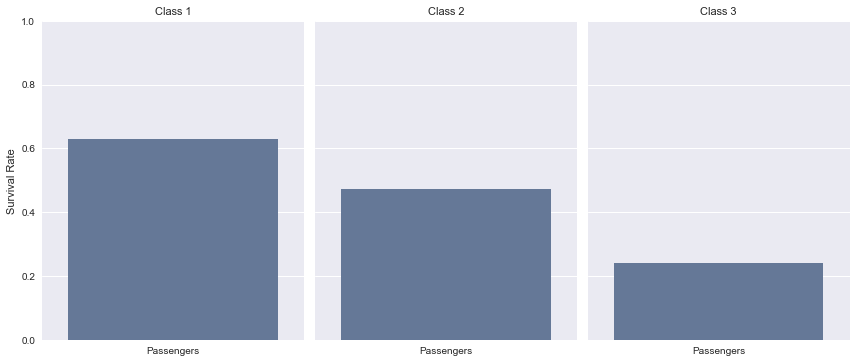

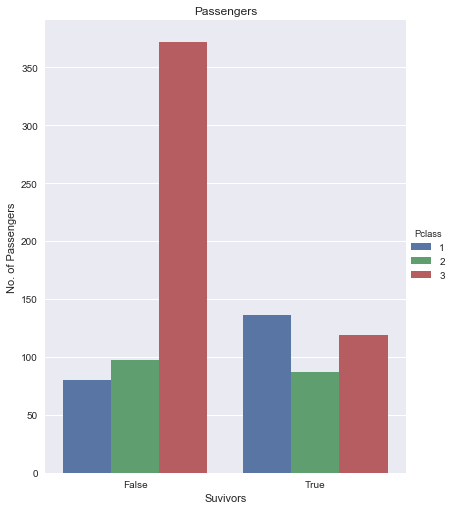

In [23]:
 # Get the actual numbers grouped by class, suvival and sex
groupedby_class_survived_size = titanic_data_cleaned.groupby(['Pclass','Survived']).size()

# Print - Grouped by class, survival
print groupedby_class_survived_size
print 'Class 1 - survival rate: {}%'.format(survival_rate(1))

print '-----'
print 'Class 2 -  survival rate: {}%'.format(survival_rate(2))

print '-----'
print 'Class 3 -  survival rate: {}%'.format(survival_rate(3))


# Graph - Grouped by class, survival and sex
g = sns.factorplot( y="Survived", col="Pclass", data=titanic_data_cleaned, 
                   saturation=.5, kind="bar", ci=None, size=5, aspect=.8)

# Fix up the labels
(g.set_axis_labels('', 'Survival Rate')
     .set_xticklabels(["Passengers"])
     .set_titles("Class {col_name}")
     .set(ylim=(0, 1))
     .despine(left=True, bottom=True))

# Graph - Actual count of passengers by survival, group and sex
g = sns.factorplot('Survived',  hue='Pclass', data=titanic_data_cleaned, kind='count', size=7, aspect=.8)

# Fix up the labels
(g.set_axis_labels('Suvivors', 'No. of Passengers')
    .set_xticklabels(["False", "True"])
    .set_titles('{col_name}')
)

titles = ['Passengers']
for ax, title in zip(g.axes.flat, titles):
    ax.set_title(title)

Based on the analysis, although passengers in Class 3 had a similar survival rate as those from Class 1 with 119 and 136 passengers surviving respectively it could be found from the overall passengers per class and the total numbers across each class that a passenger from Class 1 is about 2.5x times more likely to survive than a passenger in Class 3. Thus, class does matter in the survival rate for the titanic dataset.

## Question 2:
**Did age determine your chances of survival? **

Number of men and woman with age missing are 53 and 124 respectively
Total number of survivors 290 
Total number of non survivors 424 
Mean age of survivors 28.0 
Mean age of non survivors 31.0 
Oldest to survive 80.0 
Oldest to not survive 74.0


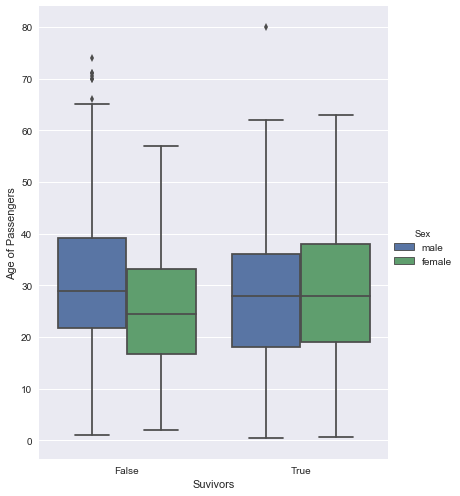

In [27]:
# Let us first identify and get rid of records with missing Age
print 'Number of men and woman with age missing are {} and {} respectively'.format(
missing_age_female.sum(),missing_age_male.sum())

# Drop the NaN values. Calculations will be okay with them (seen as zero) but will throw off averages and counts
titanic_data_age_cleaned = titanic_data_cleaned.dropna()

# Find total count of survivors and those who didn't
number_survived = titanic_data_age_cleaned[titanic_data_age_cleaned['Survived'] == True]['Survived'].count()
number_died = titanic_data_age_cleaned[titanic_data_age_cleaned['Survived'] == False]['Survived'].count()

# Find average of survivors and those who didn't
mean_age_survived = titanic_data_age_cleaned[titanic_data_age_cleaned['Survived'] == True]['Age'].mean()
mean_age_died = titanic_data_age_cleaned[titanic_data_age_cleaned['Survived'] == False]['Age'].mean()

# Display a few raw totals
print 'Total number of survivors {} \n\
Total number of non survivors {} \n\
Mean age of survivors {} \n\
Mean age of non survivors {} \n\
Oldest to survive {} \n\
Oldest to not survive {}' \
.format(number_survived, number_died, np.round(mean_age_survived), 
        np.round(mean_age_died), oldest_to_survive, oldest_to_die)


# Graph - Age of passengers across sex of those who survived
g = sns.factorplot(x="Survived", y="Age", hue='Sex', data=titanic_data_age_cleaned, kind="box", size=7, aspect=.8)

# Fix up the labels
(g.set_axis_labels('Suvivors', 'Age of Passengers')
    .set_xticklabels(["False", "True"])
)


Based on the above analysis, it could be concluded that age was not a factor in survival rate. Also, the average age of survivor and non-survivor are almost the same. 

## Question 3
** Did women and children have preference?**

Assumption:  Since the children are not specified, we assume that passenger aged under 18 is a child.

C:\Users\Sargam\Anaconda2\lib\site-packages\pandas\core\indexing.py:297: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
C:\Users\Sargam\Anaconda2\lib\site-packages\pandas\core\indexing.py:477: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


Category  Survived
Child     0            52
          1            61
Man       0           325
          1            70
Woman     0            47
          1           159
dtype: int64


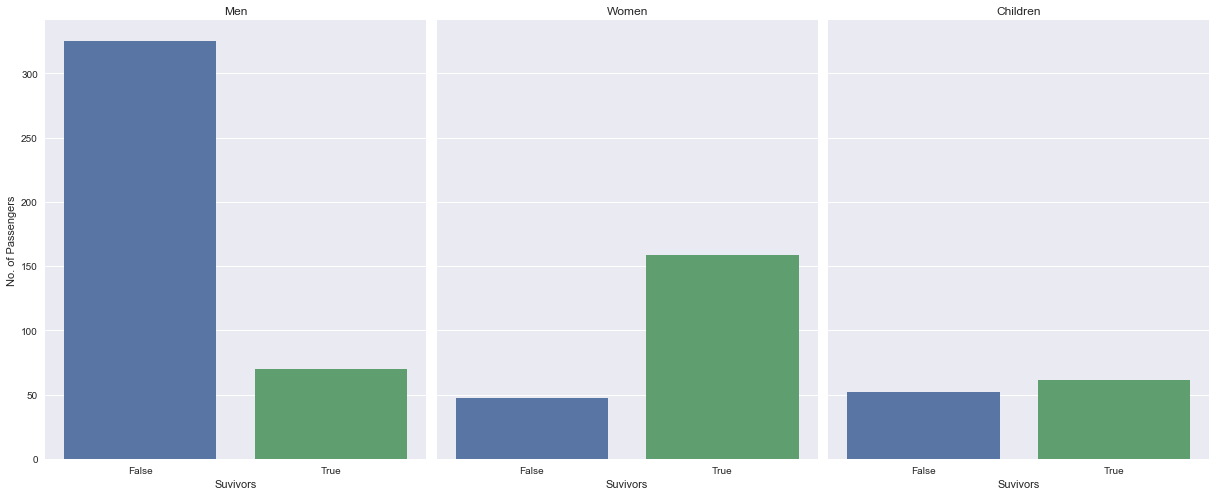

In [28]:
# Create Cateogry column and categorize people
titanic_data_age_cleaned.loc[
    ( (titanic_data_age_cleaned['Sex'] == 'female') & 
    (titanic_data_age_cleaned['Age'] >= 18) ),
    'Category'] = 'Woman'

titanic_data_age_cleaned.loc[
    ( (titanic_data_age_cleaned['Sex'] == 'male') & 
    (titanic_data_age_cleaned['Age'] >= 18) ),
    'Category'] = 'Man'

titanic_data_age_cleaned.loc[
    (titanic_data_age_cleaned['Age'] < 18),
    'Category'] = 'Child'

# Get the totals grouped by Men, Women and Children, and by survival
print titanic_data_age_cleaned.groupby(['Category','Survived']).size()

# Graph - Compare survival count between Men, Women and Children
g = sns.factorplot('Survived', col='Category', data=titanic_data_age_cleaned, kind='count', size=7, aspect=.8)

# Fix up the labels
(g.set_axis_labels('Suvivors', 'No. of Passengers')
    .set_xticklabels(['False', 'True'])
)

titles = ['Men', 'Women', 'Children']
for ax, title in zip(g.axes.flat, titles):
    ax.set_title(title)

This analysis shows that women and children first did play a greater role in the higher survival rate for the titanic shipwreck. However, the children survival rate is not that higher as that of women. This may be due to our assumption affecting the results. 

## Conclusion

The results of the analysis, although tentative, indicates that class and sex, namely, being a female or a child with upper social-economic standing (first class), would give one the best chance of survival when the tragedy occurred on the Titanic. Age did not seem to be a major factor. Also, being a man in third class, gave one the lowest chance of survival.  

Issues:
- A portion of men and women did not have Age data and were removed from calculations which could have skewed some numbers

## References
-https://www.kaggle.com/c/titanic/data
-https://github.com/adam-p/markdown-here/wiki/Markdown-Cheatsheet#lines 
-https://github.com/jasonicarter/DAND_Titanic_Data_Analysis/blob/master/TitanicData.ipynb